### Import modules

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import xtrack as xt
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import copy
import sys
import os
import imageio.v3 as iio

# Local imports
from diagram import workingDiagram
sys.path.insert(1, os.path.join(sys.path[0], '../tune_octupole'))
import analysis_functions

# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='svg'

### Load collider

In [2]:
# Define study
STUDY_NAME = "injection_oct_scan_for_experiment"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0000/config.yaml"

# Define study
collider = xt.Multiline.from_json(f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0000/collider.json")

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           


In [3]:
collider.build_trackers()

Compiling ContextCpu kernels...


0c48155ba77b42299bab96d67b9c2f34.c:4389: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 0c48155ba77b42299bab96d67b9c2f34.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study_dev/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


a3b9b51323c047e586b8e943dda2383b.c:4389: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from a3b9b51323c047e586b8e943dda2383b.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study_dev/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [4]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

### Do FMA with phase_change

In [5]:
range_octupoles = np.linspace(-45.0, 45, 19, endpoint=True)
phase_change = 1.0

collider.vars["phase_change.b1"] = phase_change
collider.vars["phase_change.b2"] = phase_change
l_fma = []
for octupoles in range_octupoles:
    collider.vars["i_oct_b1"] = octupoles
    collider.vars["i_oct_b2"] = octupoles
    l_fma.append(
        collider.lhcb1.get_fma(
            nemitt_x=2.3e-6, nemitt_y=2.3e-6, n_r=30, n_theta=30, freeze_longitudinal=True, delta0=0
        )
    )

Compiling ContextCpu kernels...


2ea22bcc38ce428eb733c3fea99d618f.c:4394: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 2ea22bcc38ce428eb733c3fea99d618f.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study_dev/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Tracking particles for fma...
Done tracking.
Computing FFT..
Done computing fma.
Tracking particles for fma...
Done tracking.
Computing FFT..
Done computing fma.
Tracking particles for fma...
Done tracking.
Computing FFT..
Done computing fma.
Tracking particles for fma...
Done tracking.
Computing FFT..
Done computing fma.
Tracking particles for fma...
Done tracking.
Computing FFT..
Done computing fma.
Tracking particles for fma...
Done tracking.
Computing FFT..
Done computing fma.
Tracking particles for fma...
Done tracking.
Computing FFT..
Done computing fma.
Tracking particles for fma...
Done tracking.
Computing FFT..
Done computing fma.
Tracking particles for fma...
Done tracking.
Computing FFT..
Done computing fma.
Tracking particles for fma...
Done tracking.
Computing FFT..
Done computing fma.
Tracking particles for fma...
Done tracking.
Computing FFT..
Done computing fma.
Tracking particles for fma...
Done tracking.
Computing FFT..
Done computin

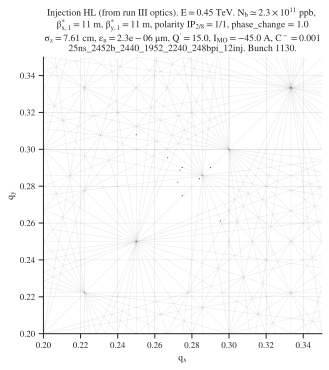

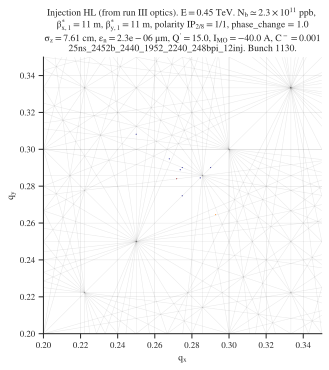

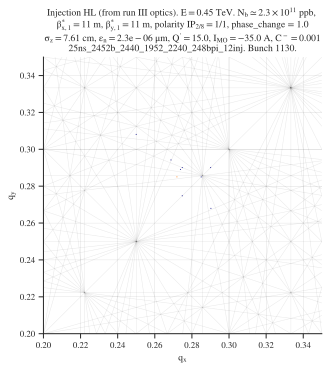

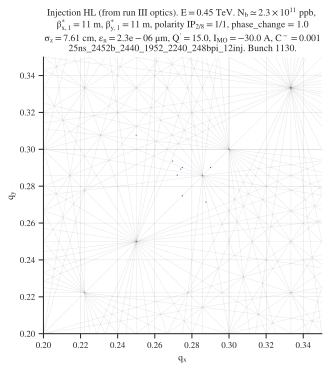

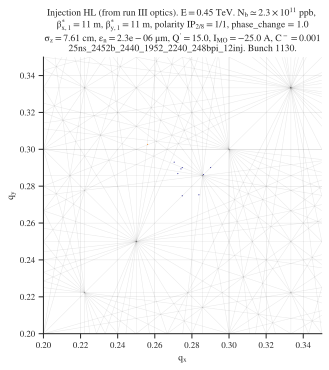

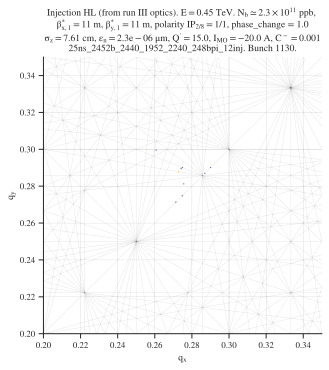

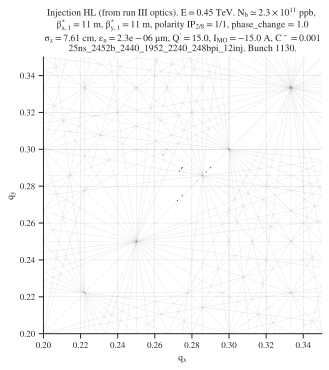

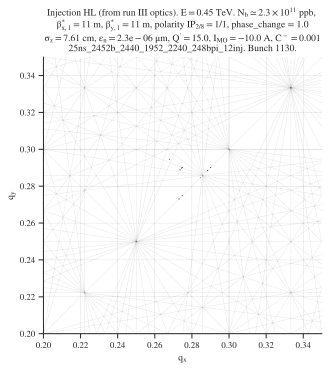

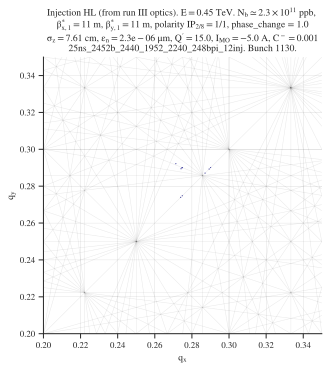

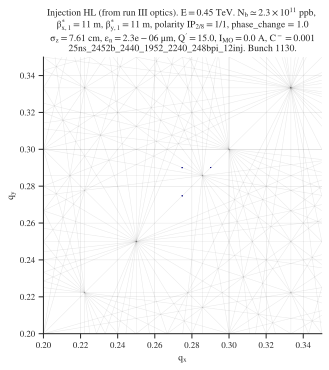

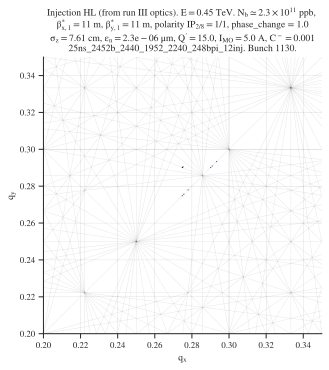

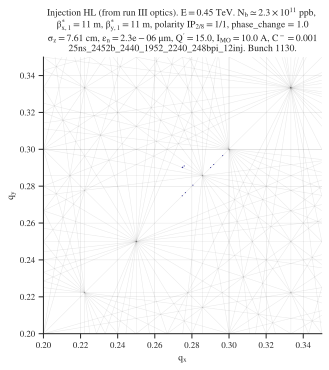

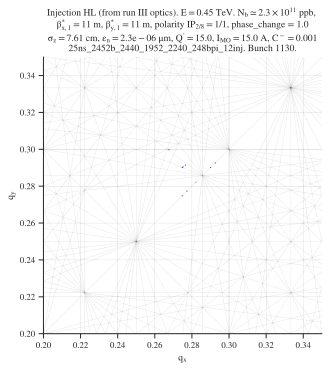

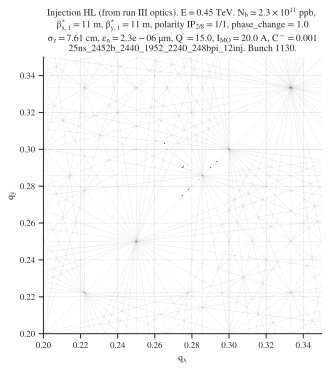

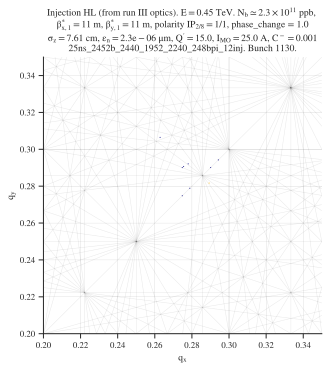

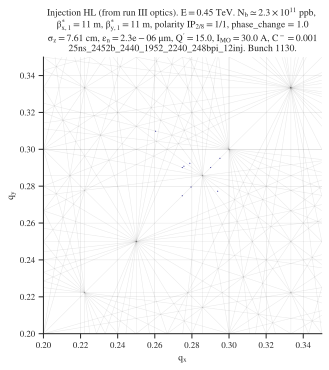

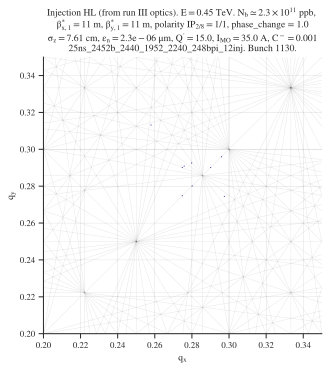

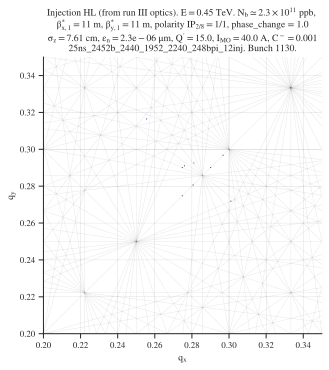

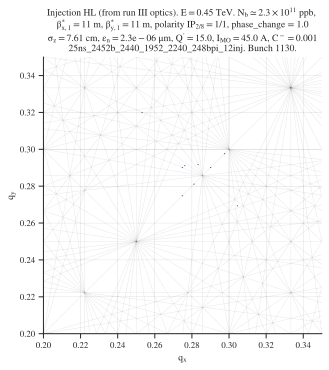

In [6]:
l_names = []
for idx, (octupoles, fma) in enumerate(zip(range_octupoles, l_fma)):
    plt.figure(figsize=(5, 5))
    workingDiagram(order=10, alpha=0.1)
    fma.plot_fma(s=0.1)
    plt.grid(True)
    plt.xlim(0.2, 0.35)
    plt.ylim(0.2, 0.35)
    plt.title(
        analysis_functions.get_title_from_conf(
            conf_mad,
            conf_collider,
            betx=11,
            bety=11,
            display_intensity=True,
            phase_knob=phase_change,
            octupoles=octupoles,
            emittance = 2.3e-6,
            LHC_version="Injection HL (from run III optics)",
        )
    )
    name = "plots/" + "{:02d}".format(idx) + f"_fma_phase_{phase_change}.png"
    plt.savefig(name, dpi=300)
    l_names.append(name)
    plt.close()
    # plt.show()
    
#Generating the gif with all the frames:
frames = np.stack([iio.imread(name) for name in l_names], axis=0)
iio.imwrite(f"plots/fma_phase_{phase_change}.gif", frames)

### Reverse phase change

In [14]:
phase_change = 0.0

collider.vars["phase_change.b1"] = phase_change
collider.vars["phase_change.b2"] = phase_change
l_fma_no_phase_change = []
for octupoles in range_octupoles:
    collider.vars["i_oct_b1"] = octupoles
    collider.vars["i_oct_b2"] = octupoles
    l_fma_no_phase_change.append(
        collider.lhcb1.get_fma(
            nemitt_x=2.3e-6, nemitt_y=2.3e-6, n_r=30, n_theta=30, freeze_longitudinal=True, delta0=0
        )
    )

Tracking particles for fma...
Done tracking.
Computing FFT..
Done computing fma.


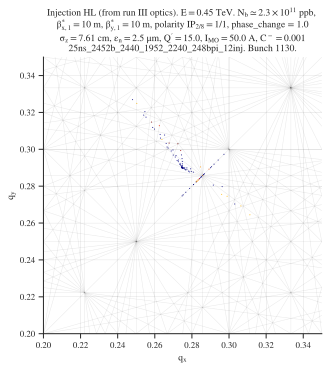

In [15]:
l_names = []
for idx, (octupoles, fma) in enumerate(zip(range_octupoles, l_fma_no_phase_change)):
    plt.figure(figsize=(5, 5))
    workingDiagram(order=10, alpha=0.1)
    fma.plot_fma(s=0.1)
    plt.grid(True)
    plt.xlim(0.2, 0.35)
    plt.ylim(0.2, 0.35)
    plt.title(
        analysis_functions.get_title_from_conf(
            conf_mad,
            conf_collider,
            betx=11,
            bety=11,
            display_intensity=True,
            phase_knob=phase_change,
            octupoles=octupoles,
            emittance = 2.3e-6,
            LHC_version="Injection HL (from run III optics)",
        )
    )
    name = "plots/" + "{:02d}".format(idx) + f"_fma_phase_{phase_change}.png"
    plt.savefig(name, dpi=300)
    l_names.append(name)
    plt.close()
    # plt.show()
    
#Generating the gif with all the frames:
frames = np.stack([iio.imread(name) for name in l_names], axis=0)
iio.imwrite(f"plots/fma_phase_{phase_change}.gif", frames)